### Tennessee opioid risk modeling 
Normal adjacency matrix - Dimentions would be different.

{'DC': ['EP_MUNIT', selected_variables_tn[0], 'EP_MINRTY', 'EP_AGE65', 'EP_CROWD'], 'TN': [selected_variables_tn[0], 'EP_NOHSDP', 'EP_PCI', 'EP_MOBILE', 'EP_POV'], 'WY': [selected_variables_tn[0], 'EP_PCI', 'EP_LIMENG', 'EP_CROWD', 'EP_UNINSUR']}

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import pickle as pickle
from pylab import *
%matplotlib inline

import warnings

# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/Users/h6x/anaconda3/envs/TDA/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [3]:
tn_svi_nod = gpd.read_file('./data/processed data/SVI with HepVu census tracts/SVI2018 TN census tracts with death rate HepVu/SVI2018_TN_census_tracts_with_death_rate_HepVu.shp')

##### Filtering the raw variables with overdose death rate

In [4]:
selected_variables = ['EP_POV','EP_UNEMP','EP_PCI','EP_NOHSDP','EP_UNINSUR','EP_AGE65','EP_AGE17','EP_DISABL','EP_SNGPNT','EP_LIMENG','EP_MINRTY','EP_MUNIT','EP_MOBILE','EP_CROWD','EP_NOVEH','EP_GROUPQ','NOD_Rate']

In [5]:
selected_variables_without_y = ['EP_POV','EP_UNEMP','EP_PCI','EP_NOHSDP','EP_UNINSUR','EP_AGE65','EP_AGE17','EP_DISABL','EP_SNGPNT','EP_LIMENG','EP_MINRTY','EP_MUNIT','EP_MOBILE','EP_CROWD','EP_NOVEH','EP_GROUPQ']

In [6]:
selected_variables_tn_with_geo = ['FIPS','EP_DISABL', 'EP_NOHSDP', 'EP_PCI', 'EP_MOBILE', 'EP_POV','NOD_Rate','geometry']

In [7]:
selected_variables_tn = ['EP_DISABL', 'EP_NOHSDP', 'EP_PCI', 'EP_MOBILE', 'EP_POV']

In [8]:
selected_variables_tn_with_od = ['EP_DISABL', 'EP_NOHSDP', 'EP_PCI', 'EP_MOBILE', 'EP_POV','NOD_Rate']

In [9]:
# get the number of rows with 999 or -999 values in the selected_variablesWy_ columns
rows_with_n999 = tn_svi_nod[(tn_svi_nod['EP_DISABL'] == -999) | (tn_svi_nod['EP_NOHSDP'] == -999) | (tn_svi_nod['EP_PCI'] == -999) | (tn_svi_nod['EP_MOBILE'] == -999) | (tn_svi_nod['EP_POV'] == -999)].shape[0]

In [10]:
rows_with_n999

23

In [11]:
# if value equals -999, replace with 0 in selected_variablesWy_
tn_svi_nod[selected_variables_tn[0]] = tn_svi_nod[selected_variables_tn[0]].replace(-999, 0)
tn_svi_nod[selected_variables_tn[1]] = tn_svi_nod[selected_variables_tn[1]].replace(-999, 0)
tn_svi_nod[selected_variables_tn[2]] = tn_svi_nod[selected_variables_tn[2]].replace(-999, 0)
tn_svi_nod[selected_variables_tn[2]] = tn_svi_nod[selected_variables_tn[2]].replace(-999, 0)
tn_svi_nod[selected_variables_tn[3]] = tn_svi_nod[selected_variables_tn[3]].replace(-999, 0)

In [12]:
tn_svi_nod[selected_variables_tn_with_geo]

,FIPS,EP_DISABL,EP_NOHSDP,EP_PCI,EP_MOBILE,EP_POV,NOD_Rate,geometry
0,47001980100,0.0,0.0,0.0,0.0,-999.0,38.3,"POLYGON ((-84.30167 35.97862, -84.29421 35.982..."
1,47009980100,25.0,0.0,8560.0,0.0,-999.0,33.4,"POLYGON ((-84.01403 35.80881, -84.00916 35.812..."
2,47017980100,0.0,0.0,0.0,0.0,-999.0,18.3,"POLYGON ((-88.70523 35.82485, -88.70462 35.828..."
3,47029980100,0.0,0.0,0.0,0.0,-999.0,29.3,"POLYGON ((-83.28079 35.74700, -83.28016 35.749..."
4,47037013000,0.0,28.3,5365.0,0.0,-999.0,34.8,"POLYGON ((-86.91273 36.19354, -86.91046 36.198..."
...,...,...,...,...,...,...,...,...
1492,47157003200,17.3,6.9,30994.0,0.0,18.7,17.0,"POLYGON ((-90.00407 35.13561, -90.00381 35.135..."
1493,47157003700,23.5,24.1,18683.0,0.0,41.6,17.0,"POLYGON ((-90.03483 35.13866, -90.03374 35.138..."
1494,47157003800,43.4,20.0,14127.0,0.0,56.8,17.0,"POLYGON ((-90.03349 35.14052, -90.03274 35.145..."
1495,47157007300,18.3,11.1,22042.0,0.0,34.8,17.0,"POLYGON ((-89.94575 35.11546, -89.94555 35.120..."


#### Check the distribution of each selected variable

In [13]:
tn_svi_nod[selected_variables_tn].describe()

,EP_DISABL,EP_NOHSDP,EP_PCI,EP_MOBILE,EP_POV
count,1497.000000,1497.000000,1497.000000,1497.000000,1497.000000
mean,16.017902,13.815631,27389.054776,9.225518,4.133868
std,6.287535,7.928427,12700.779813,10.530936,117.387760
min,0.000000,0.000000,0.000000,0.000000,-999.000000
25%,11.600000,7.700000,20445.000000,0.400000,8.800000
50%,15.900000,13.700000,24793.000000,4.500000,15.500000
75%,20.200000,18.900000,30979.000000,16.800000,23.100000
max,43.400000,45.800000,108189.000000,47.300000,78.900000


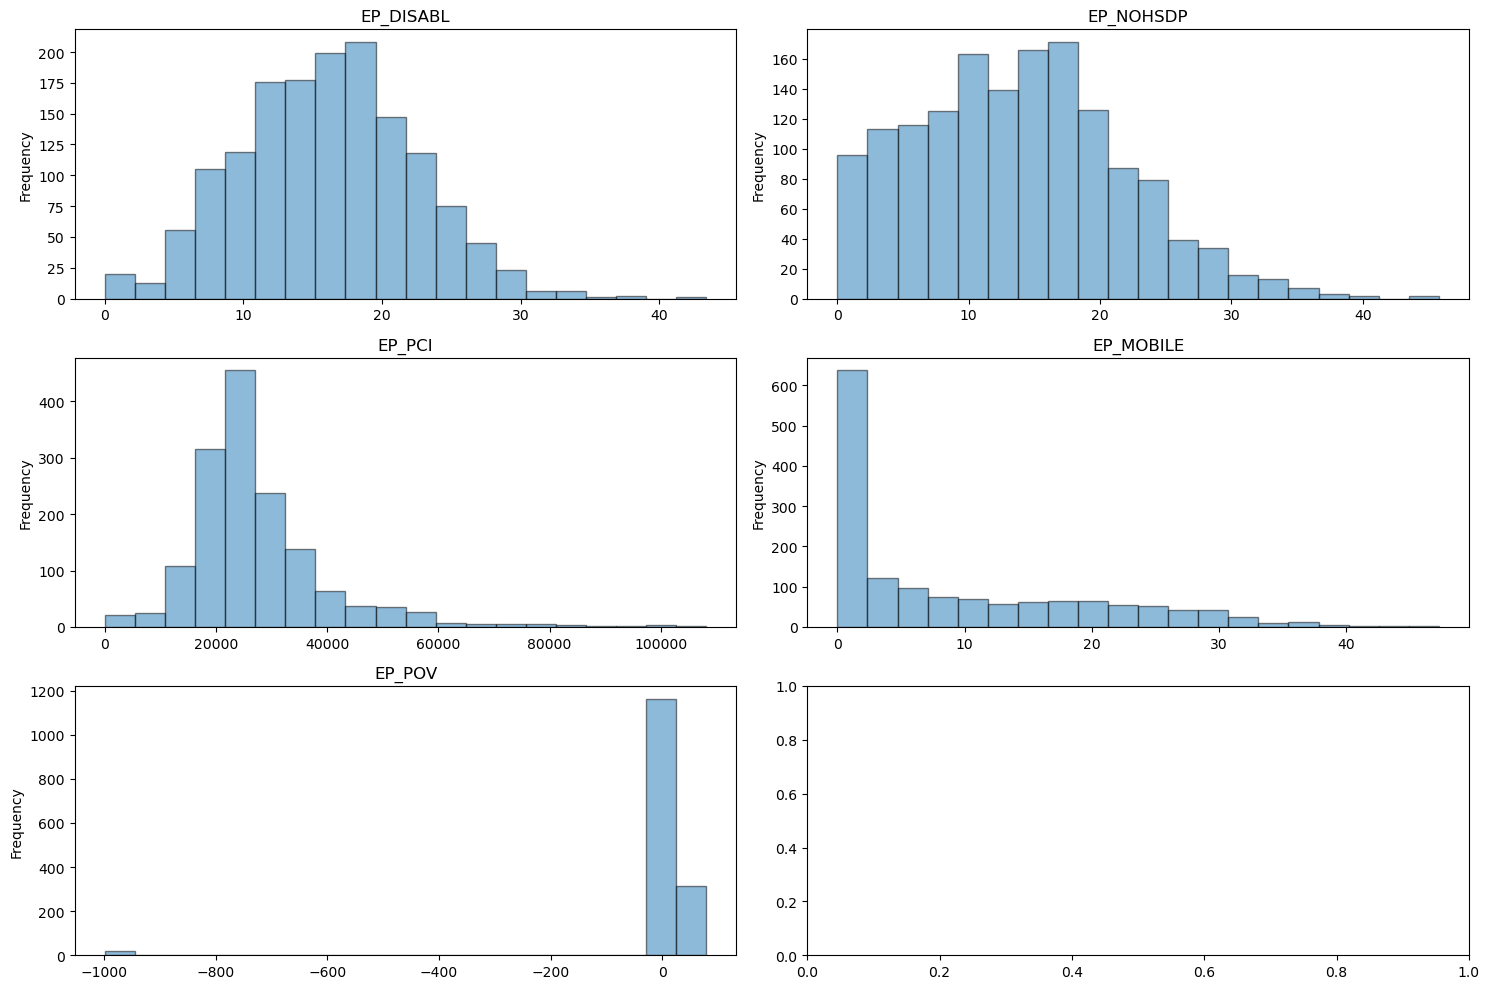

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
for i, ax in zip(selected_variables_tn, axes.flatten()):
    tn_svi_nod[i].plot.hist(bins=20, alpha=0.5, ax=ax, edgecolor='black')
    ax.set_title(i, fontsize=12)  # Adjust the fontsize here

plt.tight_layout()
plt.show()


#### Get number of rows below and above mean

In [16]:
# EP_DISABL
variable_1_mean = tn_svi_nod[selected_variables_tn[0]].mean()
variable_1_sd = tn_svi_nod[selected_variables_tn[0]].std()

# EP_PCI 
variable_2_mean = tn_svi_nod[selected_variables_tn[1]].mean()
variable_2_sd = tn_svi_nod[selected_variables_tn[1]].std()

# EP_LIMENG
variable_3_mean = tn_svi_nod[selected_variables_tn[2]].mean()
variable_3_sd = tn_svi_nod[selected_variables_tn[2]].std()

# EP_CROWD
variable_4_mean = tn_svi_nod[selected_variables_tn[2]].mean()
variable_4_sd = tn_svi_nod[selected_variables_tn[2]].std()

# EP_UNINSUR
variable_5_mean = tn_svi_nod[selected_variables_tn[3]].mean()
variable_5_sd = tn_svi_nod[selected_variables_tn[3]].std()



In [17]:
# for each selected vcariable wy calculate the number of rows that are within 1, 2 standard deviations from the mean
# EP_DISABL
variable_1_1sd = tn_svi_nod[(tn_svi_nod[selected_variables_tn[0]] >= variable_1_mean - variable_1_sd) & (tn_svi_nod[selected_variables_tn[0]] <= variable_1_mean + variable_1_sd)].shape[0]
variable_1_2sd = tn_svi_nod[(tn_svi_nod[selected_variables_tn[0]] >= variable_1_mean - 2*variable_1_sd) & (tn_svi_nod[selected_variables_tn[0]] <= variable_1_mean + 2*variable_1_sd)].shape[0]

# EP_PCI
variable_2_1sd = tn_svi_nod[(tn_svi_nod[selected_variables_tn[1]] >= variable_2_mean - variable_2_sd) & (tn_svi_nod[selected_variables_tn[1]] <= variable_2_mean + variable_2_sd)].shape[0]
variable_2_2sd = tn_svi_nod[(tn_svi_nod[selected_variables_tn[1]] >= variable_2_mean - 2*variable_2_sd) & (tn_svi_nod[selected_variables_tn[1]] <= variable_2_mean + 2*variable_2_sd)].shape[0]

# EP_LIMENG
variable_3_1sd = tn_svi_nod[(tn_svi_nod[selected_variables_tn[2]] >= variable_3_mean - variable_3_sd) & (tn_svi_nod[selected_variables_tn[2]] <= variable_3_mean + variable_3_sd)].shape[0]
variable_3_2sd = tn_svi_nod[(tn_svi_nod[selected_variables_tn[2]] >= variable_3_mean - 2*variable_3_sd) & (tn_svi_nod[selected_variables_tn[2]] <= variable_3_mean + 2*variable_3_sd)].shape[0]

# EP_CROWD
variable_4_1sd = tn_svi_nod[(tn_svi_nod[selected_variables_tn[3]] >= variable_4_mean - variable_4_sd) & (tn_svi_nod[selected_variables_tn[3]] <= variable_4_mean + variable_4_sd)].shape[0]
variable_4_2sd = tn_svi_nod[(tn_svi_nod[selected_variables_tn[3]] >= variable_4_mean - 2*variable_4_sd) & (tn_svi_nod[selected_variables_tn[3]] <= variable_4_mean + 2*variable_4_sd)].shape[0]

# EP_UNINSUR
variable_5_1sd = tn_svi_nod[(tn_svi_nod[selected_variables_tn[4]] >= variable_5_mean - variable_5_sd) & (tn_svi_nod[selected_variables_tn[4]] <= variable_5_mean + variable_5_sd)].shape[0]
variable_5_2sd = tn_svi_nod[(tn_svi_nod[selected_variables_tn[4]] >= variable_5_mean - 2*variable_5_sd) & (tn_svi_nod[selected_variables_tn[4]] <= variable_5_mean + 2*variable_5_sd)].shape[0]

# create a dataframe with the results
data = {'Variable': [selected_variables_tn[0], 'EP_PCI', selected_variables_tn[2], selected_variables_tn[3], selected_variables_tn[4]], 'Mean': [variable_1_mean, variable_2_mean, variable_3_mean, variable_4_mean, variable_5_mean], 'Standard Deviation': [variable_1_sd, variable_2_sd, variable_3_sd, variable_4_sd, variable_5_sd], 'Within 1 SD': [variable_1_1sd, variable_2_1sd, variable_3_1sd, variable_4_1sd, variable_5_1sd], 'Within 2 SD': [variable_1_2sd, variable_2_2sd, variable_3_2sd, variable_4_2sd, variable_5_2sd]}
df = pd.DataFrame(data)
df

,Variable,Mean,Standard Deviation,Within 1 SD,Within 2 SD
0,EP_DISABL,16.017902,6.287535,1014,1438
1,EP_PCI,13.815631,7.928427,980,1454
2,EP_PCI,27389.054776,12700.779813,1221,1415
3,EP_MOBILE,27389.054776,12700.779813,0,0
4,EP_POV,9.225518,10.530936,956,1280


In [18]:
# for each selected vcariable wy calculate the number of rows that are below 1 standard deviation from the mean and rows below mean and above 1 standard deviation
# EP_DISABL
variable_1_below_1sd = tn_svi_nod[(tn_svi_nod[selected_variables_tn[0]] < variable_1_mean - variable_1_sd)].shape[0]
variable_1_below_mean = tn_svi_nod[(tn_svi_nod[selected_variables_tn[0]] < variable_1_mean)].shape[0]
variable_1_below_mean_plus_1sd = tn_svi_nod[(tn_svi_nod[selected_variables_tn[0]] < variable_1_mean + variable_1_sd)].shape[0]

# EP_PCI
variable_2_below_1sd = tn_svi_nod[(tn_svi_nod[selected_variables_tn[1]] < variable_2_mean - variable_2_sd)].shape[0]
variable_2_below_mean = tn_svi_nod[(tn_svi_nod[selected_variables_tn[1]] < variable_2_mean)].shape[0]
variable_2_below_mean_plus_1sd = tn_svi_nod[(tn_svi_nod[selected_variables_tn[1]] < variable_2_mean + variable_2_sd)].shape[0]

# EP_LIMENG
variable_3_below_1sd = tn_svi_nod[(tn_svi_nod[selected_variables_tn[2]] < variable_3_mean - variable_3_sd)].shape[0]
variable_3_below_mean = tn_svi_nod[(tn_svi_nod[selected_variables_tn[2]] < variable_3_mean)].shape[0]
variable_3_below_mean_plus_1sd = tn_svi_nod[(tn_svi_nod[selected_variables_tn[2]] < variable_3_mean + variable_3_sd)].shape[0]

# EP_CROWD
variable_4_below_1sd = tn_svi_nod[(tn_svi_nod[selected_variables_tn[3]] < variable_4_mean - variable_4_sd)].shape[0]
variable_4_below_mean = tn_svi_nod[(tn_svi_nod[selected_variables_tn[3]] < variable_4_mean)].shape[0]
variable_4_below_mean_plus_1sd = tn_svi_nod[(tn_svi_nod[selected_variables_tn[3]] < variable_4_mean + variable_4_sd)].shape[0]

# EP_UNINSUR
variable_5_below_1sd = tn_svi_nod[(tn_svi_nod[selected_variables_tn[4]] < variable_5_mean - variable_5_sd)].shape[0]
variable_5_below_mean = tn_svi_nod[(tn_svi_nod[selected_variables_tn[4]] < variable_5_mean)].shape[0]
variable_5_below_mean_plus_1sd = tn_svi_nod[(tn_svi_nod[selected_variables_tn[4]] < variable_5_mean + variable_5_sd)].shape[0]

# create a dataframe with the results
data = {'Variable': [selected_variables_tn[0], selected_variables_tn[1], selected_variables_tn[2], selected_variables_tn[3], selected_variables_tn[4]], 'Below Mean-1 SD': [variable_1_below_1sd, variable_2_below_1sd, variable_3_below_1sd, variable_4_below_1sd, variable_5_below_1sd], 'Below Mean': [variable_1_below_mean, variable_2_below_mean, variable_3_below_mean, variable_4_below_mean, variable_5_below_mean], 'Below Mean + 1 SD': [variable_1_below_mean_plus_1sd, variable_2_below_mean_plus_1sd, variable_3_below_mean_plus_1sd, variable_4_below_mean_plus_1sd, variable_5_below_mean_plus_1sd]}
df = pd.DataFrame(data)
df

,Variable,Below Mean-1 SD,Below Mean,Below Mean + 1 SD
0,EP_DISABL,254,760,1268
1,EP_NOHSDP,276,766,1256
2,EP_PCI,110,945,1331
3,EP_MOBILE,1497,1497,1497
4,EP_POV,20,397,976


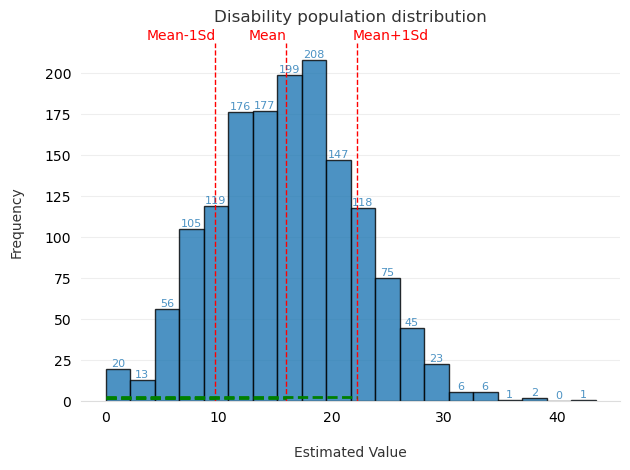

In [19]:
fig, ax = plt.subplots()
tn_svi_nod[selected_variables_tn[0]].plot.hist(bins=20, alpha=0.8, ax=ax, edgecolor='black')

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
for bar in ax.patches:
    bar_value = int(bar.get_height())
    text = f'{bar_value:,}'
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + bar_value
    bar_color = bar.get_facecolor()
    ax.text(text_x, text_y, text, ha='center', va='bottom', color=ax.patches[0].get_facecolor(),
            size=8)
    
ax.axvline(tn_svi_nod[selected_variables_tn[0]].mean() - tn_svi_nod[selected_variables_tn[0]].std(), color='r', linestyle='dashed', linewidth=1)
ax.text(tn_svi_nod[selected_variables_tn[0]].mean() - tn_svi_nod[selected_variables_tn[0]].std(), ax.get_ylim()[1], 'Mean-1Sd', color='r', va='bottom', ha='right')


# mean
ax.axvline(tn_svi_nod[selected_variables_tn[0]].mean(), color='r', linestyle='dashed', linewidth=1)
ax.text(tn_svi_nod[selected_variables_tn[0]].mean(), ax.get_ylim()[1], 'Mean', color='r', va='bottom', ha='right')


ax.axvline(tn_svi_nod[selected_variables_tn[0]].mean() + tn_svi_nod[selected_variables_tn[0]].std(), color='r', linestyle='dashed', linewidth=1)
ax.text(tn_svi_nod[selected_variables_tn[0]].mean() + 2*tn_svi_nod[selected_variables_tn[0]].std(), ax.get_ylim()[1], 'Mean+1Sd', color='r', va='bottom', ha='right')


# axhline
ax.hlines(y=2.6, xmin=0, xmax=tn_svi_nod[selected_variables_tn[0]].mean()+ tn_svi_nod[selected_variables_tn[0]].std(), color='g', linestyle='dashed', linewidth=2)
ax.hlines(y=2.4, xmin=0, xmax=tn_svi_nod[selected_variables_tn[0]].mean(), color='g', linestyle='dashed', linewidth=2)
ax.hlines(y=2.2, xmin=0, xmax=tn_svi_nod[selected_variables_tn[0]].mean()- tn_svi_nod[selected_variables_tn[0]].std(), color='g', linestyle='dashed', linewidth=2)


    
# Add labels and a title.
ax.set_xlabel('Estimated Value', labelpad=15, color='#333333')
ax.set_ylabel('Frequency', labelpad=15, color='#333333')
ax.set_title('Disability population distribution', pad=15, color='#333333')

fig.tight_layout()
plt.show()

### Adjacency Method

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import itertools
from itertools import combinations
from scipy import spatial
import pickle as pickle
import gudhi
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import io
from tqdm import tqdm
from PIL import Image, ImageDraw, ImageChops, ImageFont
import shapely.geometry as geom
from shapely.ops import unary_union
import warnings

import invr

In [22]:
tn_filtered = tn_svi_nod[selected_variables_tn_with_geo]

In [23]:
#reset index
tn_filtered = tn_filtered.reset_index(drop=True)

In [24]:
tn_filtered.head(3)

,FIPS,EP_DISABL,EP_NOHSDP,EP_PCI,EP_MOBILE,EP_POV,NOD_Rate,geometry
0,47001980100,0.0,0.0,0.0,0.0,-999.0,38.3,"POLYGON ((-84.30167 35.97862, -84.29421 35.982..."
1,47009980100,25.0,0.0,8560.0,0.0,-999.0,33.4,"POLYGON ((-84.01403 35.80881, -84.00916 35.812..."
2,47017980100,0.0,0.0,0.0,0.0,-999.0,18.3,"POLYGON ((-88.70523 35.82485, -88.70462 35.828..."


In [25]:
# get the uniques fips codes
fips = tn_filtered['FIPS'].unique()
fips

array(['47001980100', '47009980100', '47017980100', ..., '47157003800',
       '47157007300', '47157011400'], dtype=object)

Generate adjacent counties

In [26]:
def generate_adjacent_counties(dataframe,filtration_threshold,variable_name):
    filtered_df = dataframe[dataframe[variable_name] < filtration_threshold]

    # Perform a spatial join to find adjacent precincts
    adjacent_counties = gpd.sjoin(filtered_df, filtered_df, predicate='intersects', how='left')

    # Filter the results to include only the adjacent states
    adjacent_counties = adjacent_counties.query('sortedID_left != sortedID_right')

    # Group the resulting dataframe by the original precinct Name and create a list of adjacent precinct Name
    adjacent_counties = adjacent_counties.groupby('sortedID_left')['sortedID_right'].apply(list).reset_index()

    adjacent_counties.rename(columns={'sortedID_left': 'county', 'sortedID_right': 'adjacent'}, inplace=True)

    adjacencies_list = adjacent_counties['adjacent'].tolist()
    county_list = adjacent_counties['county'].tolist()

    merged_df = pd.merge(adjacent_counties, dataframe, left_on='county',right_on='sortedID', how='left')
    merged_df = gpd.GeoDataFrame(merged_df, geometry='geometry')

    return adjacencies_list,merged_df,county_list

In [27]:
def form_simplicial_complex(adjacent_county_list,county_list):
    max_dimension = 3

    V = []
    V = invr.incremental_vr(V, adjacent_county_list, max_dimension,county_list)

    return V

In [28]:
def fig2img(fig):
     #convert matplot fig to image and return it

     buf = io.BytesIO()
     fig.savefig(buf)
     buf.seek(0)
     img = Image.open(buf)
     return img

In [29]:
def plot_simplicial_complex(dataframe,V):

    #city centroids
    city_coordinates = {city.sortedID: np.array((city.geometry.centroid.x, city.geometry.centroid.y)) for _, city in dataframe.iterrows()}

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_axis_off() 

    # Plot the "wyoming_svi" DataFrame
    dataframe.plot(ax=ax, edgecolor='black', linewidth=0.3, color="white")

    # Plot the centroid of the large square with values
    # for i, row in dataframe.iterrows():
    #     centroid = row['geometry'].centroid
    #     # text_to_display = f"FIPS: {row['FIPS']}\nFilteration: {row['EP_SNGPNT']}"
    #     plt.text(centroid.x, centroid.y, str(row['FIPS']), fontsize=8, ha='center', color="black")
    #     # plt.text(centroid.x, centroid.y, text_to_display, fontsize=10, ha='center', color="black")

    for edge_or_traingle in V:

        
        if len(edge_or_traingle) == 2:
            # Plot an edge
            ax.plot(*zip(*[city_coordinates[vertex] for vertex in edge_or_traingle]), color='red', linewidth=1)
            # img = fig2img(fig)
            # list_gif.append(img)
        elif len(edge_or_traingle) == 3:
            # Plot a triangle
            ax.add_patch(plt.Polygon([city_coordinates[vertex] for vertex in edge_or_traingle], color='green', alpha=0.2))
            # img = fig2img(fig)
            # list_gif.append(img)
    plt.show()
    plt.close()

    #return list_gif #deleted  plot_simplicial_complex(dataframe,V,list_gif) --> list part

##### Multiple variable code starts here

In [30]:
selected_variables_and_threshold = {selected_variables_tn[0]: (variable_1_mean-variable_1_sd), selected_variables_tn[1]: (variable_2_mean-variable_2_sd), selected_variables_tn[2]: (variable_3_mean-variable_3_sd), selected_variables_tn[3]: (variable_4_mean-variable_4_sd), selected_variables_tn[4]: (variable_5_mean-variable_5_sd)}

In [31]:
# create a empty dictionary
edges_and_traingles_for_each_variable_below_1sd = {}

Plotting simplicial complex for EP_DISABL variable at threshold 9.730367044499651


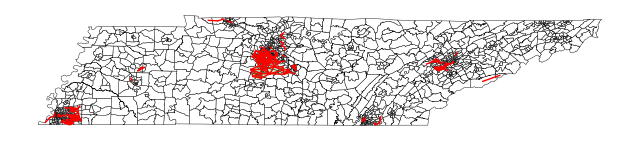

Plotting simplicial complex for EP_NOHSDP variable at threshold 5.887204177972605


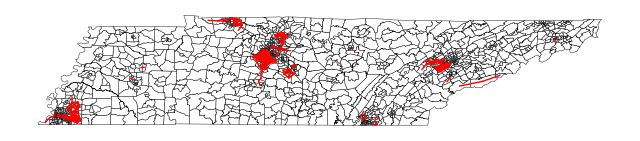

Plotting simplicial complex for EP_PCI variable at threshold 14688.274963022292


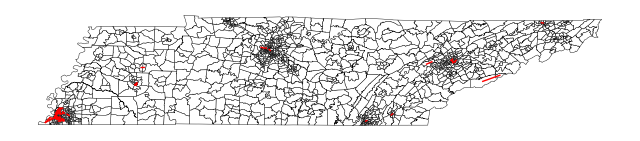

Plotting simplicial complex for EP_MOBILE variable at threshold 14688.274963022292


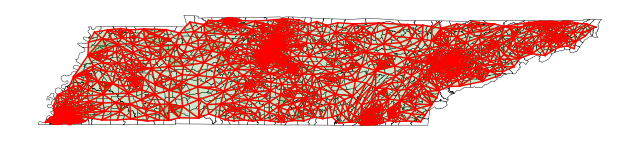

Plotting simplicial complex for EP_POV variable at threshold -1.3054185556934623


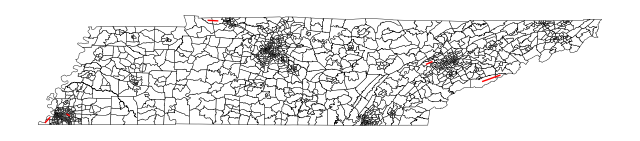

In [32]:
for variable_name, threshold in selected_variables_and_threshold.items():

    # Sorting based on the variable and selecting only the FIPS and the variable columns is important
    # Also we need to keep  the dataframe sorted based on the variable

    df_one_variable = tn_filtered[['FIPS',variable_name, 'geometry']]

    # # Sorting the DataFrame based on the 'rate' column
    df_one_variable = df_one_variable.sort_values(by=variable_name)
    df_one_variable['sortedID'] = range(len(df_one_variable))

    # Convert the DataFrame to a GeoDataFrame
    df_one_variable = gpd.GeoDataFrame(df_one_variable, geometry='geometry')
    df_one_variable.crs = "EPSG:3395"  # This is a commonly used projected CRS

    adjacencies_list,adjacent_counties_df,county_list = generate_adjacent_counties(df_one_variable,threshold,variable_name)

    # create a dictionary adjacent_counties_df column county as key and column adjacent as value(to avoid NULL adjacencies error)
    adjacent_counties_dict = dict(zip(adjacent_counties_df['county'],adjacent_counties_df['adjacent']))

    # this take only counties that have adjacent counties
    county_list = adjacent_counties_df['county'].tolist()

    V = form_simplicial_complex(adjacent_counties_dict,county_list)

    # This is a new feature that I added to the code. It creates a new list replace the sorted ID with the FIPS on the V list
    # create a new list replace the sorted ID with the FIPS on the V list
    V_FIPS = [[df_one_variable.iloc[x]['FIPS'] for x in i] for i in V]
    
    #add V list to the edges_and_traingles_for_each_variable dictionary with the key as the variable name
    edges_and_traingles_for_each_variable_below_1sd[variable_name] = V_FIPS

    # # # store the list of images for each variable
    # # list_img = []

    # # plot the simplicial complex
    print(f"Plotting simplicial complex for {variable_name} variable at threshold {threshold}")
    plot_simplicial_complex(df_one_variable,V)

In [33]:
selected_variables_and_threshold = {selected_variables_tn[0]: (variable_1_mean), 'EP_PCI': (variable_2_mean), selected_variables_tn[2]: (variable_3_mean), selected_variables_tn[3]: (variable_4_mean), selected_variables_tn[4]: (variable_5_mean)}
# create a empty dictionary
edges_and_traingles_for_each_variable_below_mean = {}

Plotting simplicial complex for EP_DISABL variable at threshold 16.01790247160989


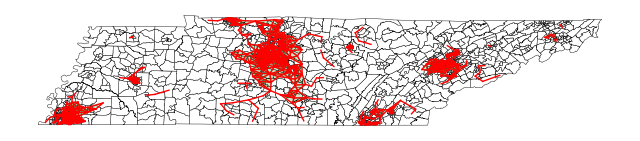

Plotting simplicial complex for EP_PCI variable at threshold 27389.054776219105


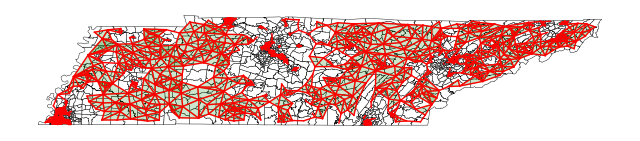

Plotting simplicial complex for EP_MOBILE variable at threshold 27389.054776219105


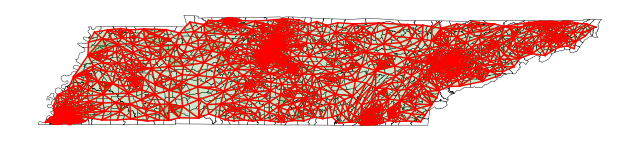

Plotting simplicial complex for EP_POV variable at threshold 9.22551770207081


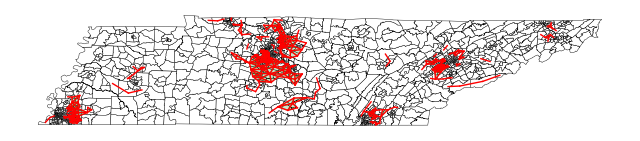

In [34]:
for variable_name, threshold in selected_variables_and_threshold.items():

    # Sorting based on the variable and selecting only the FIPS and the variable columns is important
    # Also we need to keep  the dataframe sorted based on the variable

    df_one_variable = tn_filtered[['FIPS',variable_name, 'geometry']]

    # # Sorting the DataFrame based on the 'rate' column
    df_one_variable = df_one_variable.sort_values(by=variable_name)
    df_one_variable['sortedID'] = range(len(df_one_variable))

    # Convert the DataFrame to a GeoDataFrame
    df_one_variable = gpd.GeoDataFrame(df_one_variable, geometry='geometry')
    df_one_variable.crs = "EPSG:3395"  # This is a commonly used projected CRS

    adjacencies_list,adjacent_counties_df,county_list = generate_adjacent_counties(df_one_variable,threshold,variable_name)

    # create a dictionary adjacent_counties_df column county as key and column adjacent as value(to avoid NULL adjacencies error)
    adjacent_counties_dict = dict(zip(adjacent_counties_df['county'],adjacent_counties_df['adjacent']))

    # this take only counties that have adjacent counties
    county_list = adjacent_counties_df['county'].tolist()

    V = form_simplicial_complex(adjacent_counties_dict,county_list)

    # This is a new feature that I added to the code. It creates a new list replace the sorted ID with the FIPS on the V list
    # create a new list replace the sorted ID with the FIPS on the V list
    V_FIPS = [[df_one_variable.iloc[x]['FIPS'] for x in i] for i in V]

    #add V list to the edges_and_traingles_for_each_variable dictionary with the key as the variable name
    edges_and_traingles_for_each_variable_below_mean[variable_name] = V_FIPS

    # # # store the list of images for each variable
    # # list_img = []

    # # plot the simplicial complex
    print(f"Plotting simplicial complex for {variable_name} variable at threshold {threshold}")
    plot_simplicial_complex(df_one_variable,V)

In [35]:
selected_variables_and_threshold = {selected_variables_tn[0]: (variable_1_mean+variable_1_sd), selected_variables_tn[1]: (variable_2_mean+variable_2_sd), selected_variables_tn[2]: (variable_3_mean+variable_3_sd), selected_variables_tn[3]: (variable_4_mean+variable_4_sd), selected_variables_tn[4]: (variable_5_mean+variable_5_sd)}
# create a empty dictionary
edges_and_traingles_for_each_variable_below_mean_plus_1sd = {}

Plotting simplicial complex for EP_DISABL variable at threshold 22.30543789872013


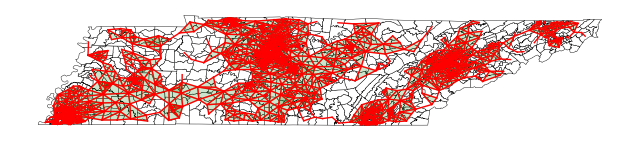

Plotting simplicial complex for EP_NOHSDP variable at threshold 21.744058347077495


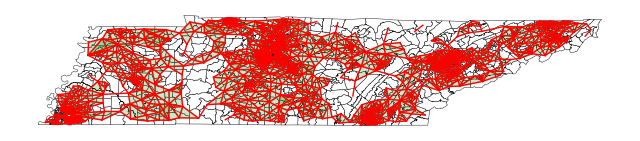

Plotting simplicial complex for EP_PCI variable at threshold 40089.83458941592


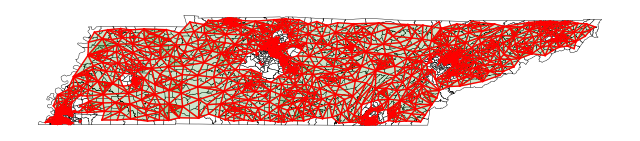

Plotting simplicial complex for EP_MOBILE variable at threshold 40089.83458941592


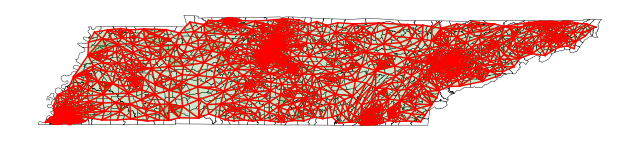

Plotting simplicial complex for EP_POV variable at threshold 19.756453959835085


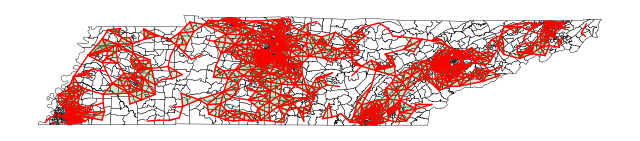

In [36]:
for variable_name, threshold in selected_variables_and_threshold.items():

    # Sorting based on the variable and selecting only the FIPS and the variable columns is important
    # Also we need to keep  the dataframe sorted based on the variable

    df_one_variable = tn_filtered[['FIPS',variable_name, 'geometry']]

    # # Sorting the DataFrame based on the 'rate' column
    df_one_variable = df_one_variable.sort_values(by=variable_name)
    df_one_variable['sortedID'] = range(len(df_one_variable))

    # Convert the DataFrame to a GeoDataFrame
    df_one_variable = gpd.GeoDataFrame(df_one_variable, geometry='geometry')
    df_one_variable.crs = "EPSG:3395"  # This is a commonly used projected CRS

    adjacencies_list,adjacent_counties_df,county_list = generate_adjacent_counties(df_one_variable,threshold,variable_name)

    # create a dictionary adjacent_counties_df column county as key and column adjacent as value(to avoid NULL adjacencies error)
    adjacent_counties_dict = dict(zip(adjacent_counties_df['county'],adjacent_counties_df['adjacent']))

    # this take only counties that have adjacent counties
    county_list = adjacent_counties_df['county'].tolist()

    V = form_simplicial_complex(adjacent_counties_dict,county_list)

    # This is a new feature that I added to the code. It creates a new list replace the sorted ID with the FIPS on the V list
    # create a new list replace the sorted ID with the FIPS on the V list
    V_FIPS = [[df_one_variable.iloc[x]['FIPS'] for x in i] for i in V]

    #add V list to the edges_and_traingles_for_each_variable dictionary with the key as the variable name
    edges_and_traingles_for_each_variable_below_mean_plus_1sd[variable_name] = V_FIPS

    # # # store the list of images for each variable
    # # list_img = []

    # # plot the simplicial complex
    print(f"Plotting simplicial complex for {variable_name} variable at threshold {threshold}")
    plot_simplicial_complex(df_one_variable,V)

##### Create a matrix for the full region(without filtering)

In [37]:
selected_regions_variable_1 = []
selected_regions_variable_2 = []
selected_regions_variable_3 = []
selected_regions_variable_4 = []
selected_regions_variable_5 = []

In [38]:
# loop through the dictionary and for each variable create a list of edges
# for variable_name, V_FIPS in edges_and_traingles_for_each_variable_below_mean.items():
for variable_name, V_FIPS in edges_and_traingles_for_each_variable_below_mean_plus_1sd.items():
    for set in V_FIPS:
        if len(set) == 2 or len(set) == 3:
            # if variable is EP_DISABL
            if variable_name == selected_variables_tn[0]:
                #check if the edge(both values) is not already in the list
                for vertice in set:
                    if vertice not in selected_regions_variable_1:
                        selected_regions_variable_1.append(vertice)
            elif variable_name == selected_variables_tn[1]:
                for vertice in set:
                    if vertice not in selected_regions_variable_2:
                        selected_regions_variable_2.append(vertice)
            elif variable_name == selected_variables_tn[2]:
                for vertice in set:
                    if vertice not in selected_regions_variable_3:
                        selected_regions_variable_3.append(vertice)
            elif variable_name == selected_variables_tn[3]:
                for vertice in set:
                    if vertice not in selected_regions_variable_4:
                        selected_regions_variable_4.append(vertice)
            elif variable_name == selected_variables_tn[4]:
                for vertice in set:
                    if vertice not in selected_regions_variable_5:
                        selected_regions_variable_5.append(vertice)
        


##### Plotting persistance

In [ ]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [ ]:
# filter the tn_filtered dataframe to only include the selected regions for selected_regions_variable_1
wyoming_DISABL_selected = tn_filtered[tn_filtered['FIPS'].isin(selected_regions_variable_1)][['FIPS',selected_variables_tn[0],'geometry']]
wyoming_PCI_selected = tn_filtered[tn_filtered['FIPS'].isin(selected_regions_variable_2)][['FIPS','EP_PCI','geometry']]
wyoming_LIMENG_selected = tn_filtered[tn_filtered['FIPS'].isin(selected_regions_variable_3)][['FIPS',selected_variables_tn[2],'geometry']]
wyoming_CROWD_selected = tn_filtered[tn_filtered['FIPS'].isin(selected_regions_variable_4)][['FIPS',selected_variables_tn[3],'geometry']]
wyoming_UNINSUR_selected = tn_filtered[tn_filtered['FIPS'].isin(selected_regions_variable_5)][['FIPS',selected_variables_tn[4],'geometry']]


# create a new column in df that contains the x and y coordinates of the centroid of each polygon
wyoming_DISABL_selected['coords'] = wyoming_DISABL_selected['geometry'].apply(lambda x: x.representative_point().coords[:])
wyoming_DISABL_selected['coords'] = [coords[0] for coords in wyoming_DISABL_selected['coords']]

wyoming_PCI_selected['coords'] = wyoming_PCI_selected['geometry'].apply(lambda x: x.representative_point().coords[:])
wyoming_PCI_selected['coords'] = [coords[0] for coords in wyoming_PCI_selected['coords']]

wyoming_LIMENG_selected['coords'] = wyoming_LIMENG_selected['geometry'].apply(lambda x: x.representative_point().coords[:])
wyoming_LIMENG_selected['coords'] = [coords[0] for coords in wyoming_LIMENG_selected['coords']]

wyoming_CROWD_selected['coords'] = wyoming_CROWD_selected['geometry'].apply(lambda x: x.representative_point().coords[:])
wyoming_CROWD_selected['coords'] = [coords[0] for coords in wyoming_CROWD_selected['coords']]

wyoming_UNINSUR_selected['coords'] = wyoming_UNINSUR_selected['geometry'].apply(lambda x: x.representative_point().coords[:])
wyoming_UNINSUR_selected['coords'] = [coords[0] for coords in wyoming_UNINSUR_selected['coords']]



In [ ]:
import ripser
import persim

from ripser import Rips
from persim import PersistenceImager

In [ ]:
# plotting the centroids
plt.scatter(*zip(*wyoming_DISABL_selected['coords']), s=10, c='r')
plt.show()

In [ ]:
# wyoming_DISABL_selected 
# wyoming_PCI_selected 
# wyoming_LIMENG_selected
# wyoming_CROWD_selected 
# wyoming_UNINSUR_selected 

In [ ]:
# create a dictionary with variable name as key and the data as value for all the selected regions
selected_coordinates_dic = {selected_variables_tn[0]: wyoming_DISABL_selected, 'EP_PCI': wyoming_PCI_selected, selected_variables_tn[2]: wyoming_LIMENG_selected, selected_variables_tn[3]: wyoming_CROWD_selected, selected_variables_tn[4]: wyoming_UNINSUR_selected}

In [ ]:
# Define custom weighting function that uses lifetime as weight 
# default weight function is 'persistance'
def weight_by_lifetime(birth, persistence, lifetime, **kwargs):
    # Use lifetime as weight
    #return lifetime
    return np.exp(lifetime)

In [ ]:
MAX_PER_LIFETIME_H0 = 0
for variable_name, selected_coordinates in selected_coordinates_dic.items():
    data_coordinates = np.array([np.array(coord) for coord in selected_coordinates['coords']])

    # creating the persistence diagram from rips class
    rips = Rips(maxdim=1, coeff=2)
    dgms = rips.fit_transform(data_coordinates)

    # seperate the diagrams H0 and H1
    diagrams_h0 = dgms[0]
    diagrams_h1 = dgms[1]

    # remove last data point in H0 diagram - it is infinity
    diagrams_h0_without_inf = diagrams_h0[0:-1]

    # get the maximum valye in y axis for H0 diagram
    max_value = np.max(diagrams_h0_without_inf)

    if max_value > MAX_PER_LIFETIME_H0:
        MAX_PER_LIFETIME_H0 = max_value

In [ ]:
MAX_PER_LIFETIME_H0

##### Plotting below mean+1sd H0

In [ ]:
# loop through the dictionary and for each variable create a list of edges
for variable_name, selected_coordinates in selected_coordinates_dic.items():

    data_coordinates = np.array([np.array(coord) for coord in selected_coordinates['coords']])

    # creating the persistence diagram from rips class
    rips = Rips(maxdim=1, coeff=2)
    dgms = rips.fit_transform(data_coordinates)

    # seperate the diagrams H0 and H1
    diagrams_h0 = dgms[0]
    diagrams_h1 = dgms[1]

    # remove last data point in H0 diagram - it is infinity
    diagrams_h0_without_inf = diagrams_h0[0:-1]

    # lifetime is y coordinates diagrams_h0_without_inf
    lifetime = diagrams_h0_without_inf[:,1]

    # pimgr = PersistenceImager(pixel_size=0.1, weight=weight_by_lifetime, weight_params={'lifetime': lifetime})
    pimgr = PersistenceImager(pixel_size=0.1)

    pimgr.fit(diagrams_h0_without_inf)

    pimgr.pixel_size = 0.03
    pimgr.birth_range = (-0.5, 0.5)
    pimgr.pers_range = (0, MAX_PER_LIFETIME_H0+0.1)


    fig, ax = plt.subplots(figsize=(10, 5))  # Adjust figsize as needed

    # Set kernel params
    pimgr.kernel_params = {'sigma': 0.003}

    # Plot diagram
    pimgr.plot_image(pimgr.transform(diagrams_h0_without_inf))
    plt.tight_layout()
    ax.axis('off')

    # save the image
    # plt.savefig(f'./results/H0 persistance images/below_mean_plus_1sd_weght_persistance_{variable_name}.png', bbox_inches='tight', pad_inches=0)

    plt.show()

    #close the plot
    plt.close()

##### Plotting below mean+1sd H1

In [ ]:
MAX_PER_H1 = 0

MAX_BIR_H1 = 0
LOW_BIR_H1 = 100

for variable_name, selected_coordinates in selected_coordinates_dic.items():
    data_coordinates = np.array([np.array(coord) for coord in selected_coordinates['coords']])

    # creating the persistence diagram from rips class
    rips = Rips(maxdim=1, coeff=2)
    dgms = rips.fit_transform(data_coordinates)

    # seperate the diagram H1
    diagrams_h1 = dgms[1]

    # Initialize empty arrays
    birth_values = []
    persistance_values = []

    print(diagrams_h1)

    # Iterate through the array
    for row in diagrams_h1:
        birth_values.append(row[0])
        persistance_values.append(row[1])



    max_birth = np.max(birth_values)
    max_persistance = np.max(persistance_values)
    low_birth = np.min(birth_values)

    if max_persistance > MAX_PER_H1:
        MAX_PER_H1 = max_persistance
    
    if max_birth > MAX_BIR_H1:
        MAX_BIR_H1 = max_birth

    if low_birth < LOW_BIR_H1:
        LOW_BIR_H1 = low_birth


print(f"Max birth: {MAX_BIR_H1}")
print(f"Low birth: {LOW_BIR_H1}")

print(f"Max persistance: {MAX_PER_H1}")



In [ ]:
# loop through the dictionary and for each variable create a list of edges
for variable_name, selected_coordinates in selected_coordinates_dic.items():

    data_coordinates = np.array([np.array(coord) for coord in selected_coordinates['coords']])

    # creating the persistence diagram from rips class
    rips = Rips(maxdim=1, coeff=2)
    dgms = rips.fit_transform(data_coordinates)

    # seperate the diagrams H0 and H1
    diagrams_h0 = dgms[0]
    diagrams_h1 = dgms[1]

    pimgr = PersistenceImager(pixel_size=0.1)

    pimgr.fit(diagrams_h1)

    pimgr.pixel_size = 0.03
    pimgr.birth_range = (LOW_BIR_H1-0.2, MAX_BIR_H1+0.2)
    # pimgr.pers_range = (0, MAX_PER_H1+0.2)
    pimgr.pers_range = (0, 0.7)

    fig, ax = plt.subplots(figsize=(10, 5))  # Adjust figsize as needed

    # Set kernel params
    pimgr.kernel_params = {'sigma': 0.003}

    # Plot diagram
    pimgr.plot_image(pimgr.transform(diagrams_h1))
    plt.tight_layout()
    ax.axis('off')

    plt.show()

    # save the image
    # plt.savefig(f'./results/H1 persistance images/below_mean_plus_1sd_weight_persistance_H1_{variable_name}.png', bbox_inches='tight', pad_inches=0)

    #close the plot
    plt.close()